<a href="https://colab.research.google.com/github/alish-ba15/FISC/blob/main/Lungs_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import shutil
import os

os.makedirs("/root/.kaggle", exist_ok=True)


shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")


os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download adityamahimkar/iqothnccd-lung-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors


In [ ]:
import os
os.listdir()


['.config',
 'drive',
 'lungs_cancer_model_second.keras',
 'iqothnccd-lung-cancer-dataset.zip',
 'sample_data']

In [ ]:
!ls


drive				   lungs_cancer_model_second.keras
iqothnccd-lung-cancer-dataset.zip  sample_data


In [ ]:
!unzip iqothnccd-lung-cancer-dataset.zip -d /content/Lung_dataset


Archive:  iqothnccd-lung-cancer-dataset.zip
  inflating: /content/Lung_dataset/Test cases/000001_03_01_088.png  
  inflating: /content/Lung_dataset/Test cases/000017_02_01_016.png  
  inflating: /content/Lung_dataset/Test cases/000019_01_01_021.png  
  inflating: /content/Lung_dataset/Test cases/000019_02_01_025.png  
  inflating: /content/Lung_dataset/Test cases/000019_03_01_025.png  
  inflating: /content/Lung_dataset/Test cases/000020_01_01_066.png  
  inflating: /content/Lung_dataset/Test cases/000020_02_01_062.png  
  inflating: /content/Lung_dataset/Test cases/000020_03_01_134.png  
  inflating: /content/Lung_dataset/Test cases/000020_03_01_166.png  
  inflating: /content/Lung_dataset/Test cases/000020_03_01_212.png  
  inflating: /content/Lung_dataset/Test cases/000020_04_01_116.png  
  inflating: /content/Lung_dataset/Test cases/000020_04_01_143.png  
  inflating: /content/Lung_dataset/Test cases/000020_04_01_159.png  
  inflating: /content/Lung_dataset/Test cases/000021_01_01_

In [ ]:
import os
print(os.listdir("/content/Lung_dataset"))


['The IQ-OTHNCCD lung cancer dataset', 'Test cases']


In [ ]:
import os
print(os.listdir("/content/Lung_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"))


['IQ-OTH_NCCD lung cancer dataset.txt', 'Malignant cases', 'Normal cases', 'Bengin cases']


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
import os
print(os.listdir("/content/Lung_dataset/cases/stages_case"))


FileNotFoundError: [Errno 2] No such file or directory: '/content/Lung_dataset/cases/stages_case'

In [ ]:
import os
import numpy as np
X_train = []
Y_train = []
path_data = '/content/Lung_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
image_size = 150
labels = ['Bengin cases', 'Malignant cases', 'Normal cases']
for i in labels:
    folderPath = os.path.join(path_data,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train)

[[[[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  ...

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]

  [[38 38 38]
   [38 38 38]
   [38 38 38]
   ...
   [38 38 38]
   [38 38 38]
   [38 38 38]]]


 [[[37 37 37]
   [37 37 37]
   [37 37 37]
   ...
   [37 37 37]
   [37 37 37]
   [37 37 37]]

  [[37 37 37]
   [37 37 37]
   [37 37 37]
   ...
   [37 37 37]
   [37 37 37]
   [37 37 37]]

  [[37 37 37]
   [37 37 37]
   [37 37 37]
   ...
   [37 37 37]
   [37 37 37]
   [37 37 37]]

  ...

  [[37 37 37]
   [37 37 37]
   [37 37 37]
   ...
   [37 37 37]
   [37 37 37]
   [37 37 37]]

  [[37 37 37]
   [37 37 37]
   [37 37 37]
   ...
   [3

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(1097, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,446,531 (16.96 MB)

 Trainable params: 4,446,531 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import pickle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 525ms/step - accuracy: 0.3976 - loss: 11.7860 - val_accuracy: 0.5364 - val_loss: 1.0203
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.5066 - loss: 0.9506 - val_accuracy: 0.5364 - val_loss: 1.0074
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5076 - loss: 0.9637 - val_accuracy: 0.5364 - val_loss: 0.9921
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5083 - loss: 0.9573 - val_accuracy: 0.5364 - val_loss: 1.0024
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5088 - loss: 0.9593 - val_accuracy: 0.5364 - val_loss: 0.9279
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6495 - loss: 0.8419 - val_accuracy: 0.7000 - val_loss: 0.8339
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6923 - loss: 0.8161 - val_accuracy: 0.7091 - val_loss: 0.8109
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7130 - loss: 0.7203 - val_accuracy: 0.7455

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import files
files.download("history.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('lungs_cancer_model.keras')

In [ ]:
from google.colab import files

# Download the model file
files.download('lungs_cancer_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


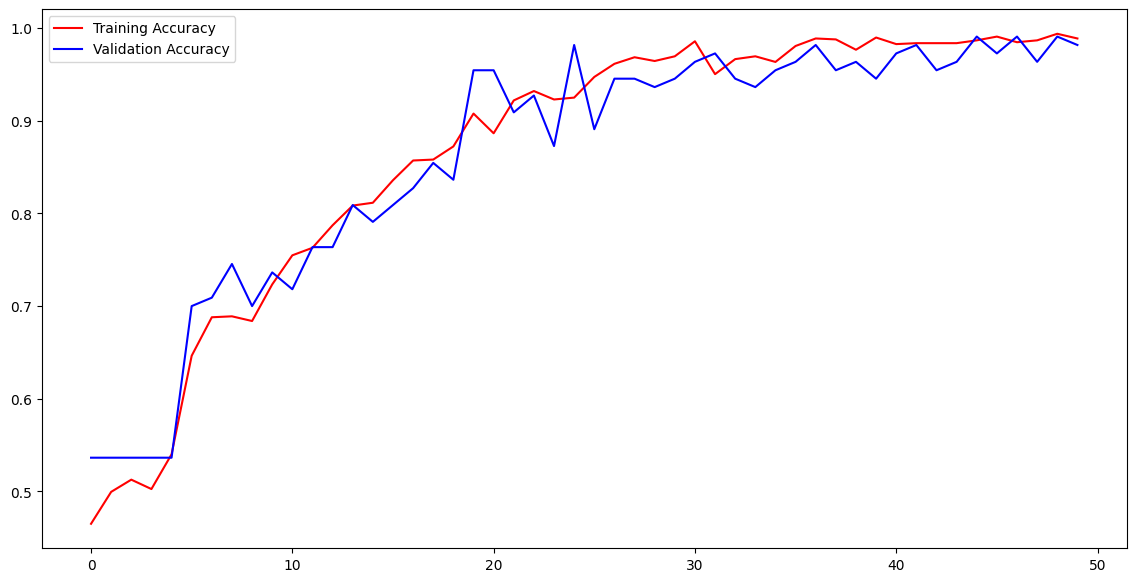

In [ ]:
with open("history.pkl", "rb") as f:
    history = pickle.load(f)

import matplotlib.pyplot as plt
import seaborn as sns

acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

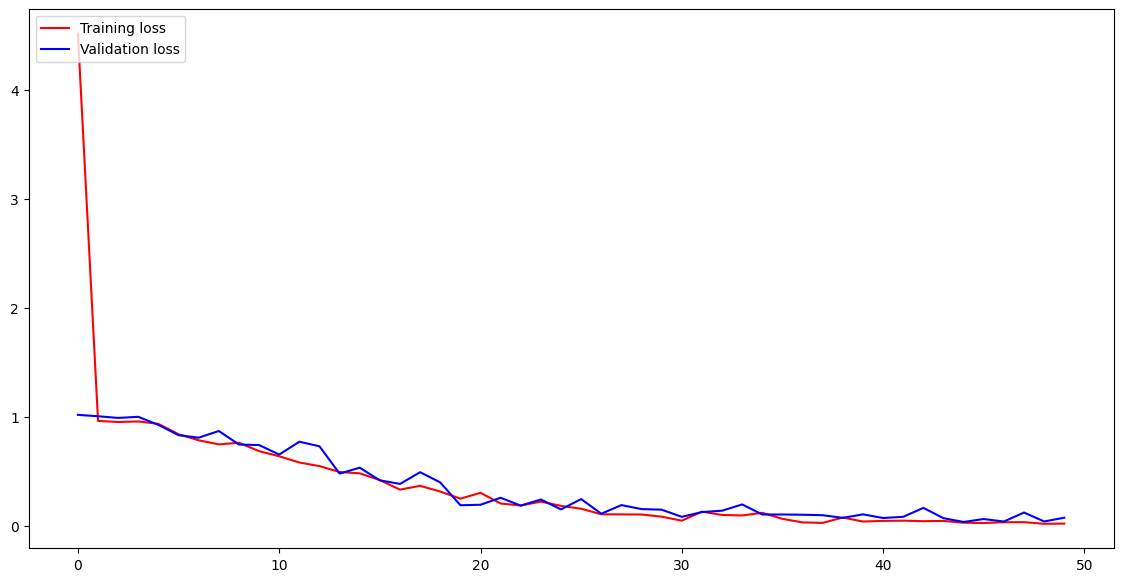

In [ ]:
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
test_pic_path = '/content/Lung_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (96).jpg'

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
labels = ['Benign', 'Malignant', 'Normal']
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true, y_pred_classes, target_names=labels))


NameError: name 'model' is not defined

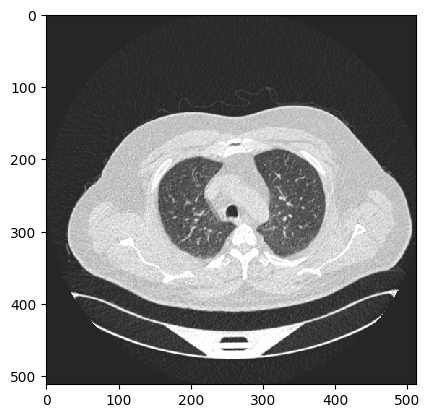

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: Bengin cases
Confidence Score: 0.9933873414993286


In [ ]:
img = cv2.imread(test_pic_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

img_array = img_array.reshape(1,150,150,3)
img_array.shape

img = image.load_img(test_pic_path)
plt.imshow(img,interpolation='nearest')
plt.show()

a=model.predict(img_array)
indices = np.argmax(a, axis=1)[0]

labels = ['Bengin cases', 'Malignant cases', 'Normal cases']
print(f"Predicted Class: {labels[indices]}")
print(f"Confidence Score: {max(a[0])}")

In [ ]:
len(X_train)

987

In [ ]:
len(y_train)

987

In [ ]:
len(X_test)

110

In [ ]:
len(y_test)

110

In [ ]:
y_pred_classes

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1])